<a href="https://colab.research.google.com/github/Maithraanand/Convolutional-Neural-Networks/blob/main/Maithraanand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cdefrom google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**PREPROCESSING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from io import BytesIO

# Load the data
path='/content/drive/MyDrive/CSV/New 1000 Sales Records.csv'
df = pd.read_csv(path)

# Prepare the features and target
X = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost']]
y = df['Sales Channel']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Replace 'your_dataset.csv' with your actual dataset file
data = pd.read_csv('/content/drive/MyDrive/CSV/New 1000 Sales Records.csv')

# Preview the data
print(data.head())

# Assume 'Target' is the column we want to predict
# Replace 'Feature1', 'Feature2', ... with your actual feature column names
X = data[['Units Sold', 'Unit Price', 'Total Revenue']]  # Features
y = data['Order Priority']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  2014-10-18  686800706  2014-10-31        8446      437.20   
1              M  2011-11-07  185941302  2011-12-08        3018      154.06   
2              C  2016-10-31  246222341  2016-12-09        1517      255.28   
3              C  2010-04-10  161442649  2010-05-12        3322      205.70   
4              H  2011-08-16  645713555  2011-08-31        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  Order year  \
0     263.33     3692591.20  2224085.18  

**TRAINING**

In [ ]:
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**TESTING**

In [ ]:
# Make predictions
y_pred = rf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

     Offline       0.55      0.50      0.53       105
      Online       0.50      0.55      0.52        95

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.53       200



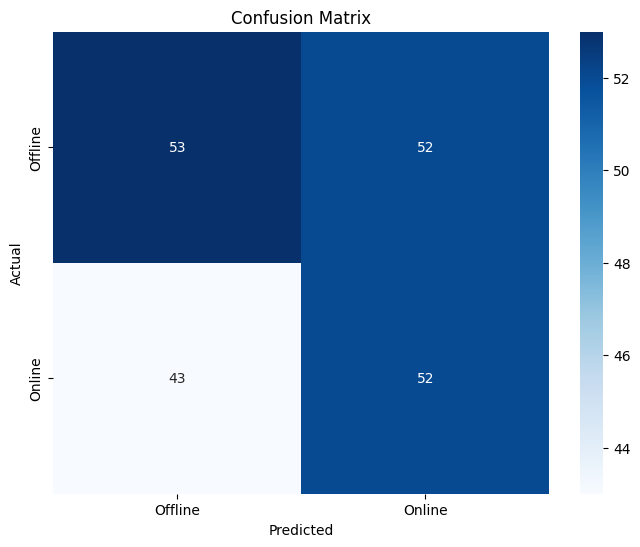

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

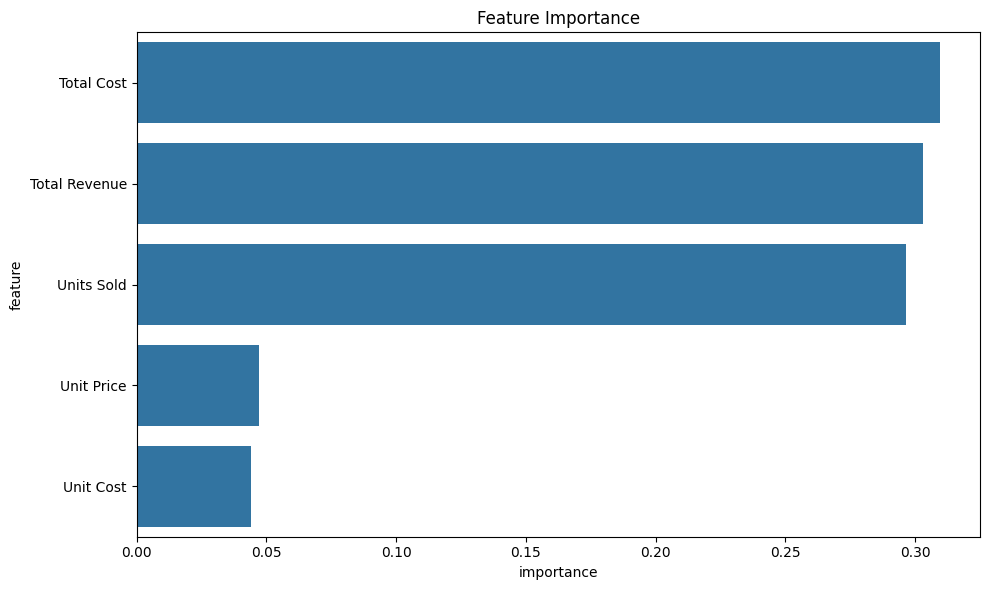

\Feature Importance:
         feature  importance
4     Total Cost    0.309548
3  Total Revenue    0.302875
0     Units Sold    0.296324
1     Unit Price    0.047189
2      Unit Cost    0.044064


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\Feature Importance:")
print(feature_importance)